# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [29]:
library('tidyverse')
library('ggrepel')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [30]:
vaccine_data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv',
    col_types = cols()
)

In [31]:
vaccine_data |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [32]:
df_vacc_rates = vaccine_data |>
    filter(mmr >= 0) |> 
    group_by(state) |>
    summarise(mmr_95 = sum(mmr >= 95, na.rm=TRUE) / n())

df_vacc_rates

state,mmr_95
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [33]:
df_vacc_rates = vaccine_data |>
    filter(mmr >= 0) |> 
    group_by(state) |>
    summarise(mmr_95 = sum(mmr >= 95, na.rm=TRUE) / n()) |>
    arrange(desc(mmr_95))

df_vacc_rates

# Arkansas has the smallest fraction of schools above the CDC target vaccination rate 

state,mmr_95
<chr>,<dbl>
Illinois,0.896825397
California,0.888506151
Massachusetts,0.865828092
New York,0.859822073
Pennsylvania,0.834966478
Connecticut,0.811544992
South Dakota,0.742627346
Montana,0.708812261
Vermont,0.683431953


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [35]:
vaccine_data_nc = vaccine_data |>
    filter(state == 'North Carolina') |>
    select(state, overall) |>
    arrange(overall) |> 
    mutate(ypos = row_number() / n())

vaccine_data_nc

state,overall,ypos
<chr>,<dbl>,<dbl>
North Carolina,-1.0,0.0004796163
North Carolina,21.7,0.0009592326
North Carolina,40.3,0.0014388489
North Carolina,42.9,0.0019184652
North Carolina,43.5,0.0023980815
North Carolina,45.0,0.0028776978
North Carolina,45.3,0.0033573141
North Carolina,46.2,0.0038369305
North Carolina,46.2,0.0043165468


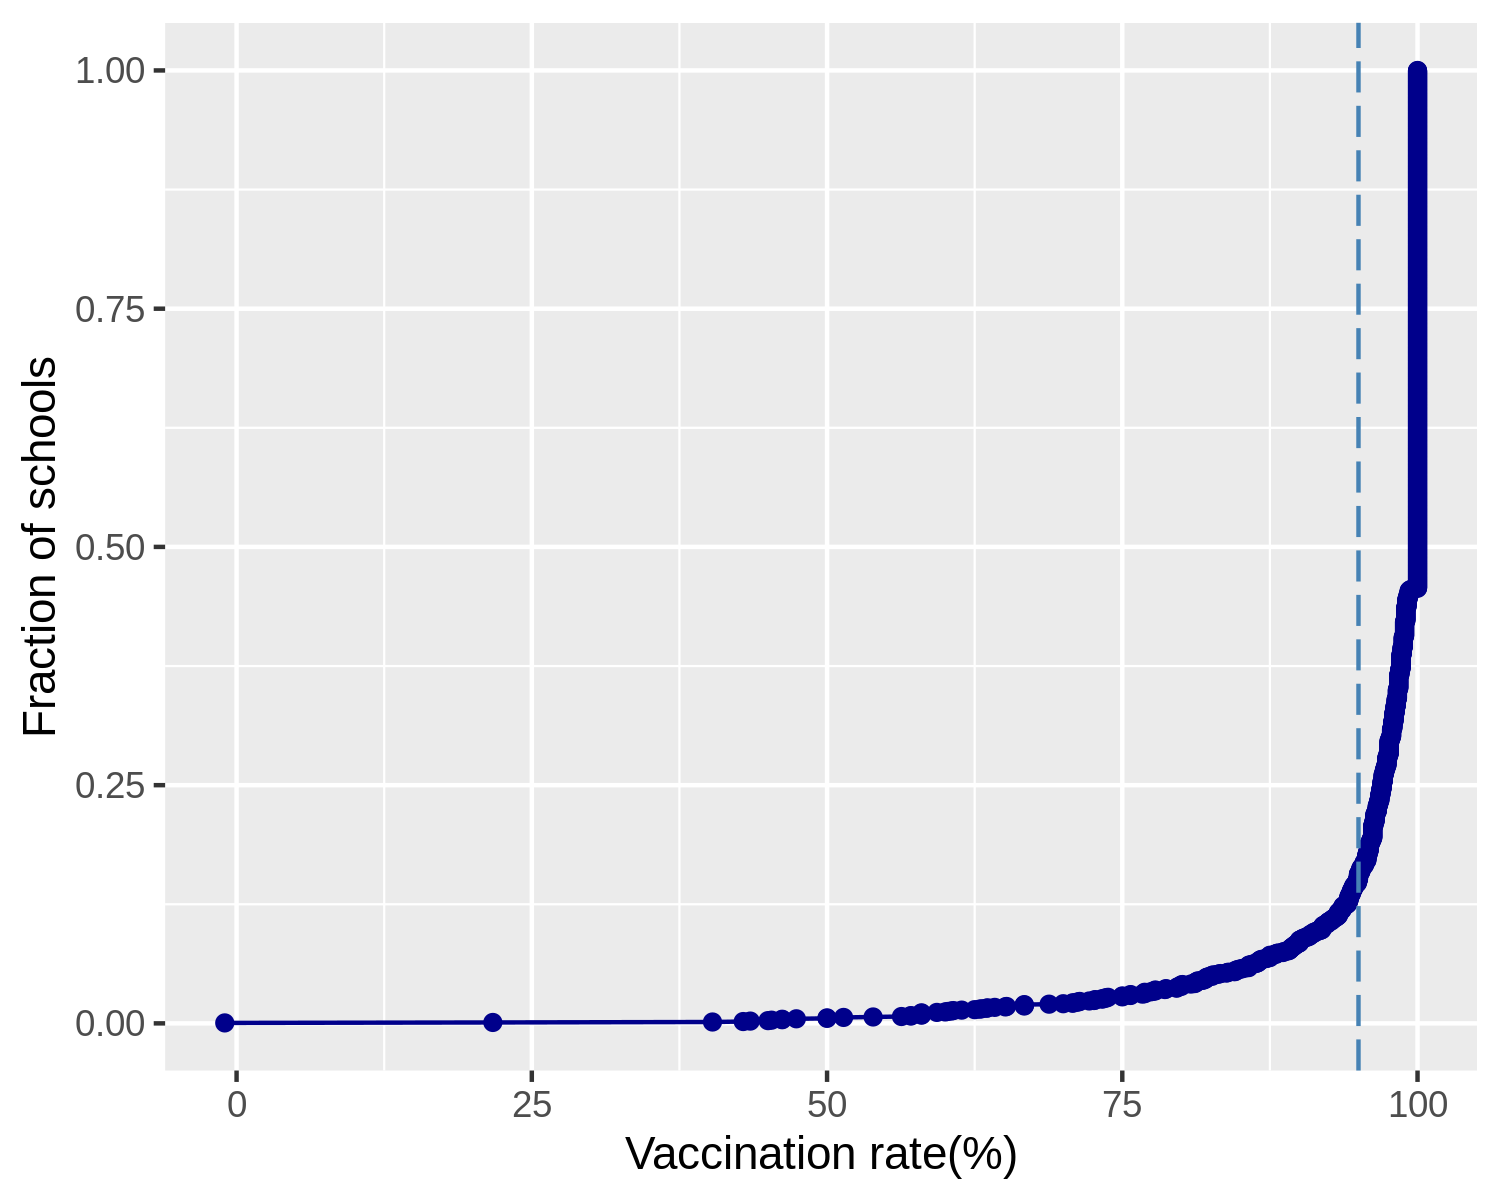

In [52]:
p = ggplot(vaccine_data_nc, aes(x = overall, y = ypos)) + 
    geom_point(color = "blue4") +
    geom_line(color = "blue4") +
    geom_vline(xintercept = 95, colour = "steelblue", linetype = "longdash") +
    labs(y = 'Fraction of schools', 
         x = 'Vaccination rate(%)')

p

# I don't quite understand what 'CDC recommended vaccination rate' is pointing to on the example and how to use geom_text_repel to get something to look similar
# Can we go over this assignment in class? 

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

 ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [53]:
vaccine_data_nc = vaccine_data |>
    filter(state == 'North Carolina') |>
    summarize(median_vac_rate = median(overall))

vaccine_data_nc

#YES it is 100!

median_vac_rate
<dbl>
100
